<a href="https://colab.research.google.com/github/umeshtiwari233/ML_Summer_training/blob/main/day4/bank_note_authentication.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. Wavelet Transform tool were used to extract features from images. Given the dataset, build a Machine Learning model to predict whether a given bank note is legit or not.

0 : Legit

1: Not legit

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
#from outliers import HandleOutliers

from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, plot_confusion_matrix, plot_roc_curve

import pickle

In [ ]:
data = pd.read_csv('/content/sample_data/BankNote_Authentication.csv')
data.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df = data.copy()
df.shape

(1372, 5)

In [ ]:
# Checking for presecne of null values in O/P as well as I/P features
df.isnull().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

## Correlation Heatmap

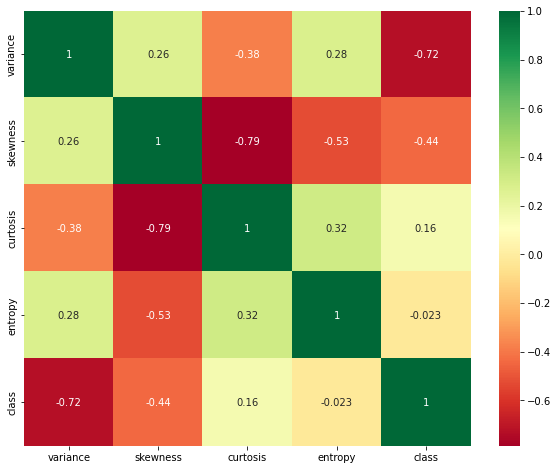

In [ ]:
corr = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='RdYlGn')
plt.show()

### There isn't much correlation within the I/P features to drop any of them

In [ ]:
# 2 O/P classes
df['class'].unique()

array([0, 1])

In [ ]:
# The dataset is pretty balanced for both the O/P classes
df['class'].value_counts()

0    762
1    610
Name: class, dtype: int64

## Train-Test Split

In [ ]:
X = df.drop(['class'], axis=1)

In [ ]:
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [ ]:
y = df['class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: class, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Feature Scaling

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train = scaler.fit_transform(X_train)

In [ ]:
X_test = scaler.transform(X_test)

## Model Building

## 1. Logistic Regression

In [ ]:
log = LogisticRegression()

In [ ]:
log_model = log.fit(X_train, y_train)

In [ ]:
log_model.score(X_test, y_test)

0.9801324503311258

## 2. KNN

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn_model = knn.fit(X_train, y_train)

In [ ]:
knn_model.score(X_test, y_test)

1.0

### The KNN model seems to be almost Perfect

## Model Performance

In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print("Classification Report: \n\n", classification_report(y_test, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       1.00      1.00      1.00       257
           1       1.00      1.00      1.00       196

    accuracy                           1.00       453
   macro avg       1.00      1.00      1.00       453
weighted avg       1.00      1.00      1.00       453



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


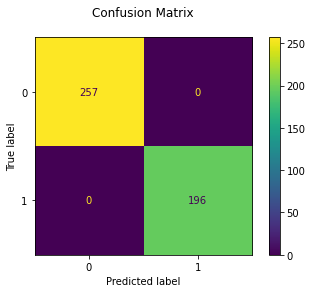

In [ ]:
plot_confusion_matrix(knn_model, X_test, y_test)
plt.title('Confusion Matrix\n')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


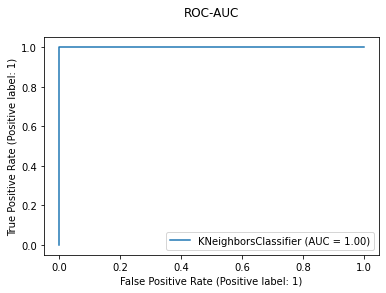

In [ ]:
plot_roc_curve(knn_model, X_test, y_test)
plt.title('ROC-AUC\n')
plt.show()

## Saving (Dumping) the model

In [ ]:
# open a file, where you want to store the data
file = open('bank_note_knn.pkl', 'wb')

# dump information to that file
pickle.dump(knn_model, file)

In [ ]:
model = open('bank_note_knn.pkl', 'rb')

## Predictions

In [ ]:
test_data = pd.DataFrame(X_test, columns=['variance', 'skewness', 'curtosis', 'entropy'])
test_data.head()

,variance,skewness,curtosis,entropy
0,0.424469,0.765542,-0.383330,-0.587638
1,-0.223275,1.076167,-1.062076,-0.644263
2,-0.107552,0.884557,-0.813739,-0.944083
3,-0.741536,1.710000,0.370490,-1.784561
4,0.725912,1.277560,-1.088273,-0.127902


In [ ]:
y_test.head()

430    0
588    0
296    0
184    0
244    0
Name: class, dtype: int64

In [ ]:
knn_model.predict(test_data.head())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


array([0, 0, 0, 0, 0])

In [ ]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [ ]:
df[df['class']== 1]

,variance,skewness,curtosis,entropy,class
762,-1.39710,3.31910,-1.392700,-1.99480,1
763,0.39012,-0.14279,-0.031994,0.35084,1
764,-1.66770,-7.15350,7.892900,0.96765,1
765,-3.84830,-12.80470,15.682400,-1.28100,1
766,-3.56810,-8.21300,10.083000,0.96765,1
...,...,...,...,...,...
1367,0.40614,1.34920,-1.450100,-0.55949,1
1368,-1.38870,-4.87730,6.477400,0.34179,1
1369,-3.75030,-13.45860,17.593200,-2.77710,1
1370,-3.56370,-8.38270,12.393000,-1.28230,1


In [ ]:
knn_model.predict([[3.62160, 8.6661, -2.8073, -0.44699]])

array([0])